In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
import pandas as pd
encoding = 'ISO-8859-1'  
df = pd.read_csv('D:\\IMDB.csv', encoding=encoding)
df.to_csv('D:\\IMDB_utf8.csv', encoding='utf-8', index=False)



In [67]:
import chardet
with open('D:\\IMDB.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  

{'encoding': 'ISO-8859-1', 'confidence': 0.7299887800151064, 'language': ''}


In [4]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
data.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,-1995.0,NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,-1993.0,NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,-1992.0,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
data.shape

(15509, 10)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 15509
Number of Columns 10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [9]:
print("Any missing value?", data.isnull().values.any())

Any missing value? True


In [10]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [11]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

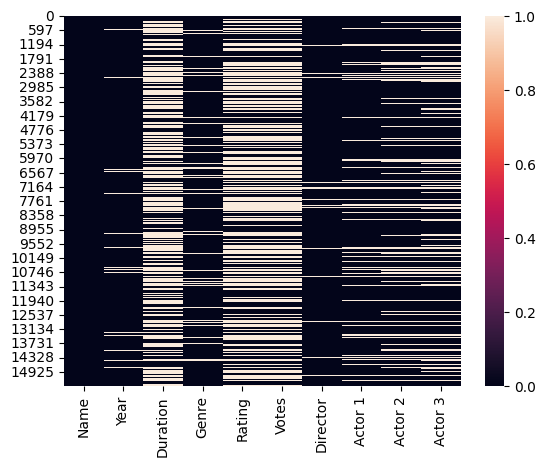

In [12]:
sns.heatmap(data.isnull())

In [13]:
per_missing = data.isnull().sum() * 100/ len(data)
per_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [14]:
data.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
dup_data = data.duplicated().any()

In [16]:
print("Are there any duplicate values?", dup_data)

Are there any duplicate values? True


In [17]:
data = data.drop_duplicates()
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.describe()

,Year,Rating
count,14976.000000,7919.000000
mean,-1987.006677,5.841621
std,25.417491,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [19]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15503,14976.000000,7239,13627,7919.000000,7920,14979,13888,13122,12363
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2779,NaN,227,58,158,83,91
mean,NaN,-1987.006677,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.417491,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [20]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [21]:
print(data.isna().sum()) 
print(data.head()) 

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4

In [22]:
print(data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [23]:
print(data['Duration'].head(10))  

0        NaN
1    109 min
2     90 min
3    110 min
4    105 min
5    147 min
6    142 min
7     59 min
8     82 min
9    116 min
Name: Duration, dtype: object


In [24]:
print(data['Duration'].dtype)  

object


In [25]:
import re
def convert_duration(duration_str):
    if isinstance(duration_str, str):
        hours = re.search(r'(\d+)h', duration_str)
        minutes = re.search(r'(\d+)m', duration_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60  
        if minutes:
            total_minutes += int(minutes.group(1))  
        return total_minutes
    return None 
data['Duration'] = data['Duration'].apply(convert_duration)
print(data['Duration'].head(10))
long_movies = data[data['Duration'] >= 180]

if long_movies.empty:
    print("No movies with a duration of 180 minutes or more found.")
else:
    print(long_movies)


0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Duration, dtype: float64
No movies with a duration of 180 minutes or more found.


In [26]:
import pandas as pd
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
print("Number of NaN values in 'Duration':", data['Duration'].isna().sum())
print(data['Duration'].describe()) 
print("Unique values in 'Duration':", data['Duration'].unique())
long_movies = data[data['Duration'] >= 180]
if long_movies.empty:
    print("No movies with a duration of 180 minutes or more found.")
else:
    print(long_movies)

Number of NaN values in 'Duration': 8264
count    7239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Duration, dtype: float64
Unique values in 'Duration': [nan  0.]
No movies with a duration of 180 minutes or more found.


In [27]:
data[data['Duration']>=180]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [28]:
data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [29]:
data[data['Duration']>=180]['Name']

Series([], Name: Name, dtype: object)

In [30]:
import pandas as pd
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
mean_votes_per_year = data.groupby('Year')['Votes'].mean().sort_values(ascending=False)
print(mean_votes_per_year)


Year
-2013.0    213.975806
-2008.0    203.924731
-2003.0    198.535714
-2010.0    197.388350
-2006.0    193.934066
              ...    
-1923.0           NaN
-1922.0           NaN
-1915.0           NaN
-1914.0           NaN
-1913.0           NaN
Name: Votes, Length: 102, dtype: float64


Text(0.5, 1.0, 'Votes by year')

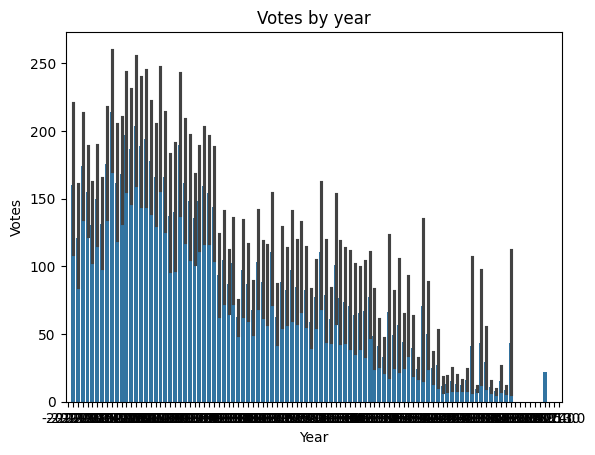

In [31]:
sns.barplot(x='Year', y='Votes', data=data)
plt.title("Votes by year")

In [32]:
import pandas as pd
data['Votes'] = pd.to_numeric(data['Duration'], errors='coerce')
mean_votes_per_year = data.groupby('Year')['Duration'].mean().sort_values(ascending=False)
print(mean_votes_per_year)

Year
-2022.0    0.0
-2021.0    0.0
-2020.0    0.0
-2019.0    0.0
-2018.0    0.0
          ... 
-1922.0    NaN
-1917.0    NaN
-1915.0    NaN
-1914.0    NaN
-1913.0    NaN
Name: Duration, Length: 102, dtype: float64


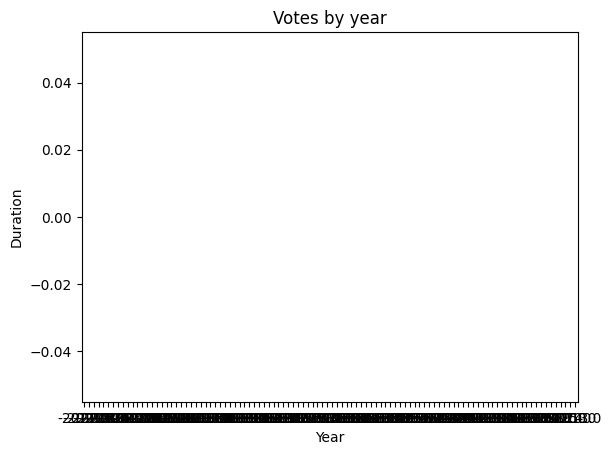

In [33]:
sns.barplot(x='Year', y='Duration', data=data)
plt.title("Votes by year")
plt.show()

In [34]:
import pandas as pd
data['Votes'] = pd.to_numeric(data['Rating'], errors='coerce')
mean_votes_per_year = data.groupby('Director')['Rating'].mean().sort_values(ascending=False)
print(mean_votes_per_year)

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Munni Pankaj        9.4
Suhrud Godbole      9.4
                   ... 
Zia Khan Lodhi      NaN
Zia-ur-Rasheed      NaN
Zohra               NaN
Zubeida             NaN
Zul Vellani         NaN
Name: Rating, Length: 5938, dtype: float64


In [35]:
data.nlargest(10,'Duration')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,0.0,Drama,7.0,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,0.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,0.0,"Comedy, Romance",4.4,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,0.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,0.0,"Comedy, Drama, Musical",4.7,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,0.0,"Drama, Romance, War",7.4,7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,0.0,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,0.0,"Horror, Mystery, Thriller",5.6,5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,0.0,"Action, Crime, Thriller",4.0,4.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,0.0,Drama,6.2,6.2,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni


In [36]:
data.nlargest(10,'Duration')[['Name', 'Duration']]

,Name,Duration
1,#Gadhvi (He thought he was Gandhi),0.0
2,#Homecoming,0.0
3,#Yaaram,0.0
4,...And Once Again,0.0
5,...Aur Pyaar Ho Gaya,0.0
6,...Yahaan,0.0
7,.in for Motion,0.0
8,?: A Question Mark,0.0
9,@Andheri,0.0
10,1:1.6 An Ode to Lost Love,0.0


In [37]:
top10_len=data.nlargest(10,'Duration')[['Name', 'Duration']].set_index('Name')

In [38]:
top10_len

,Duration
Name,
#Gadhvi (He thought he was Gandhi),0.0
#Homecoming,0.0
#Yaaram,0.0
...And Once Again,0.0
...Aur Pyaar Ho Gaya,0.0
...Yahaan,0.0
.in for Motion,0.0
?: A Question Mark,0.0
@Andheri,0.0


<Axes: xlabel='Duration', ylabel='Name'>

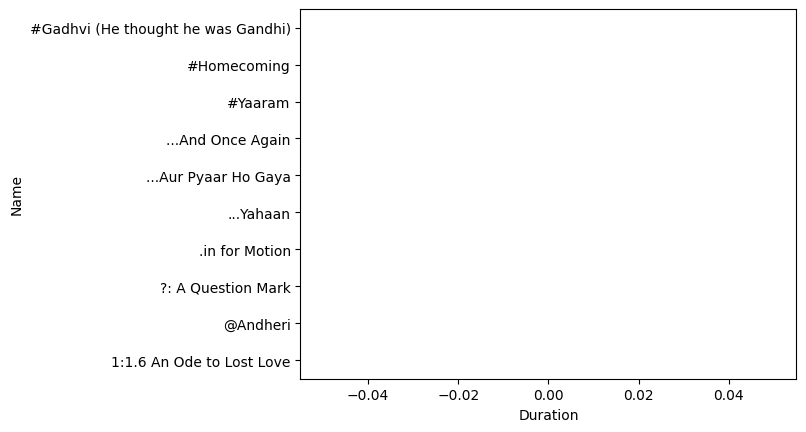

In [39]:
sns.barplot(x='Duration', y=top10_len.index,data=top10_len)

In [40]:
data['Year'].value_counts()

Year
-2019.0    408
-2021.0    392
-2018.0    381
-2017.0    360
-2005.0    346
          ... 
-1922.0      1
-1913.0      1
-1926.0      1
-1914.0      1
-1924.0      1
Name: count, Length: 102, dtype: int64

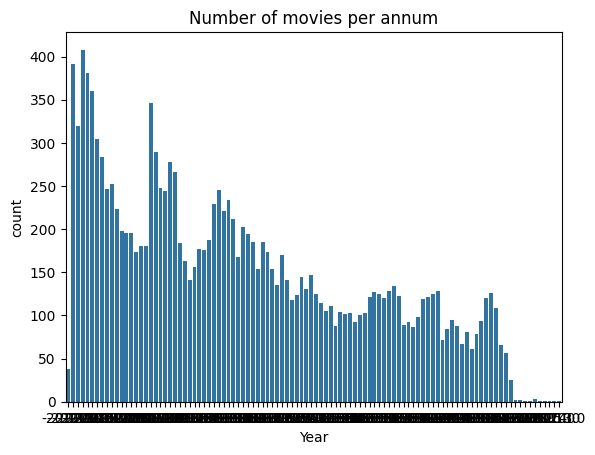

In [41]:
sns.countplot(x='Year', data=data)
plt.title("Number of movies per annum")
plt.show()

In [42]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [43]:
top10_len=data.nlargest(10,'Rating')[['Name', 'Director']].set_index('Name')

In [44]:
top10_len

,Director
Name,
Love Qubool Hai,Saif Ali Sayeed
Half Songs,Sriram Raja
Breed,Bobby Kumar
Gho Gho Rani,Munni Pankaj
June,Suhrud Godbole
Ram-Path,Ashish Dubey
The Reluctant Crime,Arvind Pratap
Ashok Vatika,Rahul Mallick
Baikunth,Vishwa Bhanu


In [45]:
import pandas as pd
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
mean_votes_per_year = data.groupby('Year')['Rating'].mean().sort_values(ascending=False)
print(mean_votes_per_year)

Year
-1948.0    7.073684
-1950.0    7.061290
-1940.0    6.954545
-1952.0    6.848148
-1953.0    6.820690
             ...   
-1923.0         NaN
-1922.0         NaN
-1915.0         NaN
-1914.0         NaN
-1913.0         NaN
Name: Rating, Length: 102, dtype: float64


In [46]:
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
        return "Average"

In [47]:
data['rating_cat']=data['Rating'].apply(rating)

In [48]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,rating_cat
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Average
1,#Gadhvi (He thought he was Gandhi),-2019.0,0.0,Drama,7.0,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Excellent
2,#Homecoming,-2021.0,0.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Average
3,#Yaaram,-2019.0,0.0,"Comedy, Romance",4.4,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
4,...And Once Again,-2010.0,0.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Average


In [49]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'rating_cat'],
      dtype='object')

In [50]:
data['Genre'].dtype

dtype('O')

In [51]:
data['Genre'].str.contains('Action',case=False)

0        False
1        False
2        False
3        False
4        False
         ...  
15504     True
15505     True
15506     True
15507     True
15508     True
Name: Genre, Length: 15503, dtype: object

In [52]:
import pandas as pd
data['Genre'] = data['Genre'].fillna('')
action_movies = data[data['Genre'].str.contains('Action', case=False)]
print(action_movies)


                       Name    Year  Duration                    Genre  \
9                  @Andheri -2014.0       0.0  Action, Crime, Thriller   
26     13 May Gulaabi Nagar -2010.0       NaN                   Action   
33                   16-Dec -2002.0       0.0         Action, Thriller   
34                    18.11 -2014.0       0.0                   Action   
42       1942: A Love Story -1994.0       0.0   Action, Drama, History   
...                     ...     ...       ...                      ...   
15504   Zulm Ko Jala Doonga -1988.0       NaN                   Action   
15505                 Zulmi -1999.0       0.0            Action, Drama   
15506             Zulmi Raj -2005.0       NaN                   Action   
15507         Zulmi Shikari -1988.0       NaN                   Action   
15508          Zulm-O-Sitam -1998.0       0.0            Action, Drama   

       Rating  Votes            Director           Actor 1          Actor 2  \
9         4.0    4.0   Biju Bhas

In [53]:
len(data[data['Genre'].str.contains('Action',case=False)])

3542

In [54]:
data['Genre']

0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15503, dtype: object

In [55]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))


In [56]:
list1

[['Drama'],
 ['Drama'],
 ['Drama', ' Musical'],
 ['Comedy', ' Romance'],
 ['Drama'],
 ['Comedy', ' Drama', ' Musical'],
 ['Drama', ' Romance', ' War'],
 ['Documentary'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Drama'],
 ['Horror'],
 ['Horror', ' Romance', ' Thriller'],
 ['Comedy', ' Drama', ' Romance'],
 ['Thriller'],
 ['Comedy', ' Drama'],
 [''],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 [''],
 ['Comedy', ' Drama', ' Family'],
 ['Crime', ' Drama', ' Mystery'],
 ['Horror', ' Thriller'],
 ['Biography'],
 ['Documentary'],
 ['Comedy', ' Horror'],
 ['Action'],
 ['Drama'],
 ['Drama', ' Horror', ' Mystery'],
 ['Comedy'],
 ['Drama'],
 [''],
 ['Drama'],
 ['Action', ' Thriller'],
 ['Action'],
 ['Drama', ' History'],
 ['Drama'],
 ['Drama', ' History', ' Sport'],
 ['Horror', ' Mystery', ' Romance'],
 ['Horror', ' Mystery'],
 ['Drama', ' Horror', ' Romance'],
 ['Horror', ' Mystery', ' Romance'],
 ['Action', ' Drama', ' History'],
 [

In [57]:
one_d=[]
for item in list1:
    for item in item:
        one_d.append(item)

In [58]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 '',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 '',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 '',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Co

In [59]:
uni_list=[]
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [60]:
uni_list

['Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 ' Drama',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 'Thriller',
 '',
 ' Fantasy',
 ' Family',
 'Crime',
 'Biography',
 ' Horror',
 ' History',
 ' Sport',
 'Adventure',
 ' Sci-Fi',
 'War',
 'Sport',
 ' Comedy',
 ' Adventure',
 ' Biography',
 'Mystery',
 'Musical',
 ' Music',
 'Romance',
 'Family',
 'Fantasy',
 'Sci-Fi',
 'Animation',
 'Music',
 'History',
 ' Action',
 ' News',
 ' Western',
 ' Reality-TV',
 'Reality-TV',
 ' Short']

In [61]:
len(uni_list)

44

In [62]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item)

In [63]:
one_d

[['Drama'],
 ['Drama'],
 ['Drama', ' Musical'],
 ['Drama', ' Musical'],
 ['Comedy', ' Romance'],
 ['Comedy', ' Romance'],
 ['Drama'],
 ['Comedy', ' Drama', ' Musical'],
 ['Comedy', ' Drama', ' Musical'],
 ['Comedy', ' Drama', ' Musical'],
 ['Drama', ' Romance', ' War'],
 ['Drama', ' Romance', ' War'],
 ['Drama', ' Romance', ' War'],
 ['Documentary'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Drama'],
 ['Horror'],
 ['Horror', ' Romance', ' Thriller'],
 ['Horror', ' Romance', ' Thriller'],
 ['Horror', ' Romance', ' Thriller'],
 ['Comedy', ' Drama', ' Romance'],
 ['Comedy', ' Drama', ' Romance'],
 ['Comedy', ' Drama', ' Romance'],
 ['Thriller'],
 ['Comedy', ' Drama'],
 ['Comedy', ' Drama'],
 [''],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comed